# 11: API Requests
- Author: Agustín Arturo Melian Su
- Date: 29/08/2025
- Goal: Effectuate API requests

In [21]:
import os
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
load_dotenv()

True

## Meteorological API

In [3]:
# curl "https://api.open-meteo.com/v1/forecast?latitude=52.52&longitude=13.41&current=temperature_2m,wind_speed_10m&hourly=temperature_2m,relative_humidity_2m,wind_speed_10m" 
url = 'https://api.open-meteo.com/v1/forecast'
params = { 
    'latitude': 21.161416,  # Cancún
    'longitude': -86.824811,
    'past_days': 10,
    'hourly':'temperature_2m,relative_humidity_2m,wind_speed_10m'
    }

response = requests.get(url, params=params)

In [4]:
if (response.status_code == 200):
    data = response.json()
    print(f'Data retrieve succesfully: {data.keys()}')
else:
    print(f'Error: {response.status_code}')

Data retrieve succesfully: dict_keys(['latitude', 'longitude', 'generationtime_ms', 'utc_offset_seconds', 'timezone', 'timezone_abbreviation', 'elevation', 'hourly_units', 'hourly'])


In [5]:
data

{'latitude': 21.125,
 'longitude': -86.875,
 'generationtime_ms': 17.52924919128418,
 'utc_offset_seconds': 0,
 'timezone': 'GMT',
 'timezone_abbreviation': 'GMT',
 'elevation': 8.0,
 'hourly_units': {'time': 'iso8601',
  'temperature_2m': '°C',
  'relative_humidity_2m': '%',
  'wind_speed_10m': 'km/h'},
 'hourly': {'time': ['2025-08-21T00:00',
   '2025-08-21T01:00',
   '2025-08-21T02:00',
   '2025-08-21T03:00',
   '2025-08-21T04:00',
   '2025-08-21T05:00',
   '2025-08-21T06:00',
   '2025-08-21T07:00',
   '2025-08-21T08:00',
   '2025-08-21T09:00',
   '2025-08-21T10:00',
   '2025-08-21T11:00',
   '2025-08-21T12:00',
   '2025-08-21T13:00',
   '2025-08-21T14:00',
   '2025-08-21T15:00',
   '2025-08-21T16:00',
   '2025-08-21T17:00',
   '2025-08-21T18:00',
   '2025-08-21T19:00',
   '2025-08-21T20:00',
   '2025-08-21T21:00',
   '2025-08-21T22:00',
   '2025-08-21T23:00',
   '2025-08-22T00:00',
   '2025-08-22T01:00',
   '2025-08-22T02:00',
   '2025-08-22T03:00',
   '2025-08-22T04:00',
   '2025-

In [6]:
df_weather = pd.DataFrame(data['hourly'])
df_weather['time'] = pd.to_datetime(df_weather['time'])
df_weather = df_weather.set_index('time')
df_weather.head()

,temperature_2m,relative_humidity_2m,wind_speed_10m
time,,,
2025-08-21 00:00:00,28.1,78,6.5
2025-08-21 01:00:00,26.9,84,5.4
2025-08-21 02:00:00,26.3,88,4.5
2025-08-21 03:00:00,25.8,91,5.2
2025-08-21 04:00:00,25.5,94,4.8


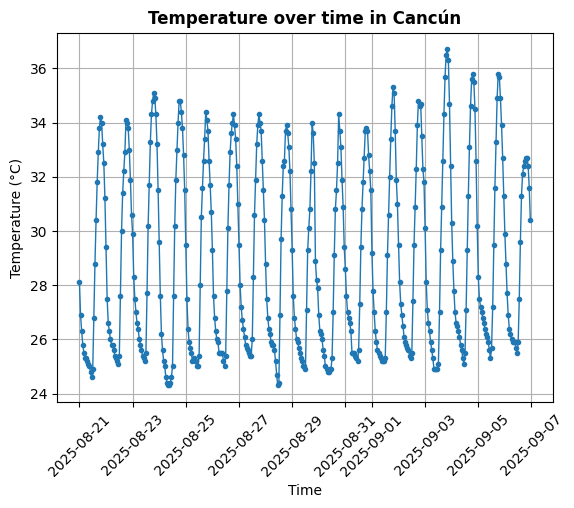

In [9]:
plt.plot(
    df_weather.index, df_weather['temperature_2m'], 
    marker='o', linestyle='-', linewidth=1, markersize=3
)
plt.xlabel('Time')
plt.ylabel('Temperature (°C)')
plt.title('Temperature over time in Cancún', fontweight='bold')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [13]:
df_weather.columns = ['temperature_c', 'relative_humidity_pct', 'wind_speed_kmh']

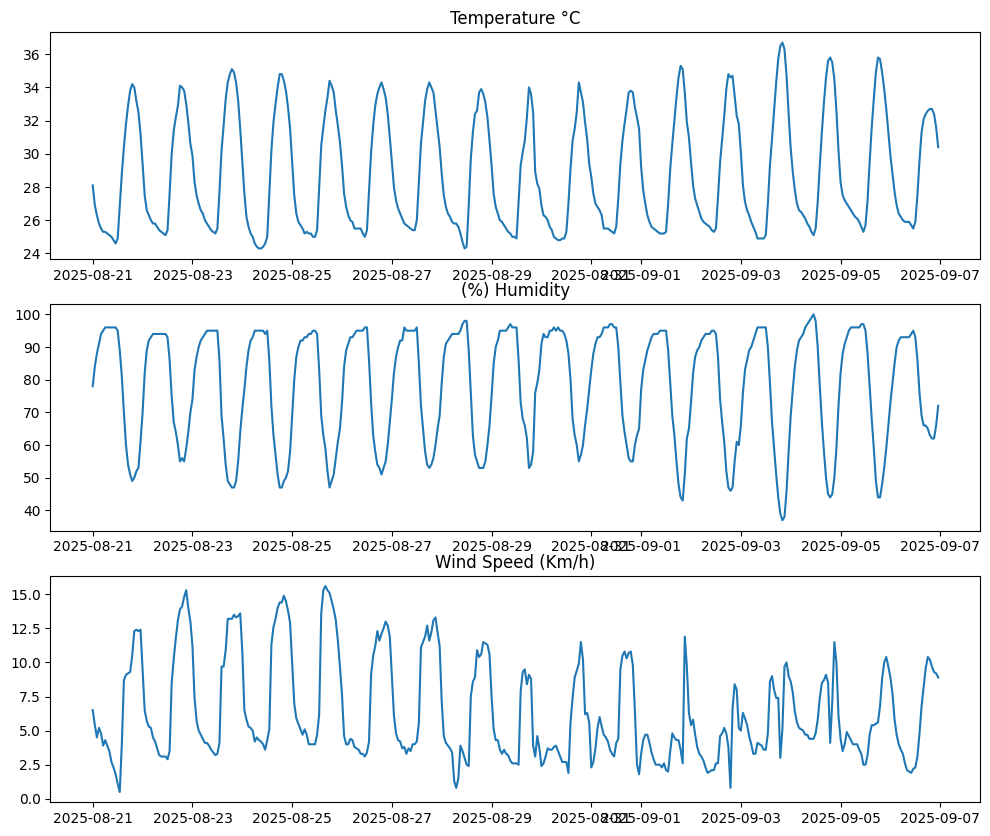

In [18]:
fig,(ax1, ax2, ax3) = plt.subplots(3,1, figsize=(12,10))


ax1.plot(df_weather.index, df_weather["temperature_c"])
ax1.set_title("Temperature °C")


ax2.plot(df_weather.index, df_weather["relative_humidity_pct"])
ax2.set_title("(%) Humidity")

ax3.plot(df_weather.index, df_weather["wind_speed_kmh"])
ax3.set_title("\nWind Speed (Km/h)")

plt.show()

## Spotify API

In [43]:
import spotipy 
from spotipy.oauth2 import SpotifyClientCredentials

In [44]:
spotifyClient = os.getenv('SPOTIFY_CLIENT')
spotifySecret = os.getenv('SPOTIFY_SECRET')

In [45]:
sp = spotipy.Spotify(
    auth_manager=SpotifyClientCredentials(
        client_id=spotifyClient, 
        client_secret=spotifySecret
    ),
    requests_timeout=10,
    retries=10
)

In [46]:
results = sp.search(q='Air supply', limit=20)

for idx, track in enumerate(results['tracks']['items']):
    print(f"{idx} {track['name']}")

    

0 Making Love Out of Nothing at All
1 All Out of Love
2 Open Arms (2022 Remaster)
3 If You Leave Me Now
4 Without You
5 Missing You
6 Making Love Out of Nothing at All
7 Lost In Love
8 Lost In Love
9 Air Supply - 2021 Remaster
10 Having You Near Me
11 Even the Nights Are Better
12 Cryin'
13 All Out of Love
14 Only the Young (2024 Remaster)
15 Goodbye
16 Nothin' At All
17 The One That You Love
18 Just as I Am
